In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

num_examples = 100

In [48]:
X = np.array([np.linspace(-2, 4, num_examples), np.linspace(-6, 6, num_examples)])
X += np.random.randn(2, num_examples)
x, y = X
x = np.matrix(x).T
y = np.matrix(y).T
print(x.shape, y.shape)

(100, 1) (100, 1)


In [49]:
x_with_bias = np.hstack((np.ones((num_examples, 1)), x))
print(x_with_bias.shape)

(100, 2)


In [50]:
losses = []
training_steps = 300
learning_rate = 0.002

In [51]:
with tf.Session() as sess:
    input = tf.constant(x_with_bias, dtype=tf.float32)
    target = tf.constant(y, dtype=tf.float32)
    # Variables are initialized with the init opp, in this case tf.random_normal
    weights = tf.Variable(tf.random_normal(shape=(2, 1), mean=0, stddev=1), dtype=tf.float32)
    
    tf.initialize_all_variables().run()
    
    yhat = tf.matmul(input, weights)
    yerror = tf.sub(yhat, target)
    loss = tf.reduce_mean(tf.nn.l2_loss(yerror))
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    update_weights = optimizer.minimize(loss)
    
    for _ in range(training_steps):
        update_weights.run()
        a = loss.eval()
        print("Loss %d: " % _, a)
        losses.append(a)
        
    
    betas = weights.eval()
    yhat = yhat.eval()

Loss 0:  331.772
Loss 1:  295.835
Loss 2:  269.205
Loss 3:  249.47
Loss 4:  234.845
Loss 5:  224.007
Loss 6:  215.975
Loss 7:  210.023
Loss 8:  205.612
Loss 9:  202.343
Loss 10:  199.921
Loss 11:  198.125
Loss 12:  196.795
Loss 13:  195.809
Loss 14:  195.078
Loss 15:  194.537
Loss 16:  194.136
Loss 17:  193.838
Loss 18:  193.618
Loss 19:  193.455
Loss 20:  193.334
Loss 21:  193.244
Loss 22:  193.178
Loss 23:  193.128
Loss 24:  193.092
Loss 25:  193.065
Loss 26:  193.045
Loss 27:  193.03
Loss 28:  193.019
Loss 29:  193.011
Loss 30:  193.005
Loss 31:  193.0
Loss 32:  192.997
Loss 33:  192.994
Loss 34:  192.993
Loss 35:  192.991
Loss 36:  192.99
Loss 37:  192.989
Loss 38:  192.989
Loss 39:  192.988
Loss 40:  192.988
Loss 41:  192.988
Loss 42:  192.988
Loss 43:  192.988
Loss 44:  192.988
Loss 45:  192.988
Loss 46:  192.987
Loss 47:  192.987
Loss 48:  192.987
Loss 49:  192.987
Loss 50:  192.987
Loss 51:  192.987
Loss 52:  192.987
Loss 53:  192.987
Loss 54:  192.987
Loss 55:  192.987
Loss 56

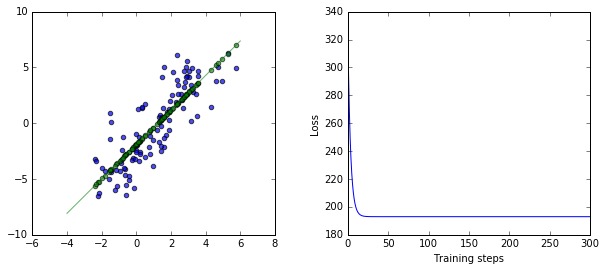

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(10, 4)
ax1.scatter(x, y, alpha=.7)
ax1.scatter(x, yhat, c="g", alpha=.6)
line_x_range = (-4, 6)
ax1.plot(line_x_range, [betas[0] + a * betas[1] for a in line_x_range], "g", alpha=0.6)
ax2.plot(range(0, training_steps), losses)
ax2.set_ylabel("Loss")
ax2.set_xlabel("Training steps")
plt.show()